In [1]:
# Cell 1: Markdown
# --- 2.0 Processed Data Exploration (Advanced) ---

# ### Section 1: Setup and Imports
# This notebook performs a detailed analysis of the cleaned and processed dataset
# to understand its characteristics and relationships between features.



In [ ]:
# Cell 2 — Setup and Imports
# - Configure paths and logging
# - Locate project root and load config
# - Import core libraries and set visualization styles

import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

# Get the path to the project's root directory
current_path = Path().resolve()
project_root = None
for parent in current_path.parents:
    if (parent / 'emoji_sentiment_analysis' / 'config.py').exists():
        project_root = parent
        break
        
if project_root is None:
    raise FileNotFoundError("Could not find the project root. Make sure you are inside the repository.")

# Add the project's root to the Python path
sys.path.insert(0, str(project_root))
sys.path.append(str(project_root / 'emoji_sentiment_analysis'))

# Import configuration variables
import config

PROCESSED_DATA_DIR = config.PROCESSED_DATA_DIR
TEXT_COL = config.TEXT_COL
TARGET_COL = config.TARGET_COL

# Configure plotting styles
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')



In [ ]:
# Cell 3 — Load Processed Data
# Load the combined processed CSV file generated by dataset.py
# and ensure the file exists before continuing.

# ### Section 2: Load the Processed Data
# Load the output file from the `dataset.py` script.



In [ ]:
# Cell 4 — Data Loading
# - Load processed dataset into a DataFrame
# - Handle file not found errors with clear logging

logger.info(f"Loading processed data from {PROCESSED_DATA_DIR / 'combined_data_processed.csv'}...")

file_path = PROCESSED_DATA_DIR / 'combined_data_processed.csv'

try:
    df = pd.read_csv(file_path)
    logger.success("Data loaded successfully!")
    
except FileNotFoundError:
    logger.error(f"Processed data file not found at {file_path}. Please run `python -m emoji_sentiment_analysis.dataset` first.")
    raise



2025-09-22 16:03:16.751 | INFO     | __main__:<module>:2 - Loading processed data from C:\Users\Willard\python-projects\emoji_sentiment_analysis\data\processed\combined_data_processed.csv...
2025-09-22 16:03:16.794 | SUCCESS  | __main__:<module>:8 - Data loaded successfully!


In [ ]:
# Cell 5: Markdown
# ### Section 3: Initial Data Inspection
# Validate structure: preview rows, check datatypes, confirm shape.



In [ ]:
# Cell 6 — Data Inspection
# - Show sample rows
# - Print DataFrame info and shape
# - Confirm key columns exist

print("\n--- First 5 rows of the processed dataframe ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()

print(f"\nDataFrame shape: {df.shape}")




--- First 5 rows of the processed dataframe ---
   label                                               text
0      1                             Good morning every one
1      0  TW: S AssaultActually horrified how many frien...
2      1  Thanks by has notice of me Greetings : Jossett...
3      0                its ending soon aah unhappy _EMOJI_
4      1                         My real time happy _EMOJI_

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1000 non-null   int64 
 1   text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB

DataFrame shape: (1000, 2)


In [ ]:
# Cell 7 — Bivariate Feature–Label Analysis
# Engineer text-based features and analyze how they relate
# to the sentiment label using visualizations.

# ### Section 4: Bivariate Analysis: Feature-Label Relationships



2025-09-22 16:03:16.979 | INFO     | __main__:<module>:10 - 
Analyzing relationship between emoji placeholder and sentiment...


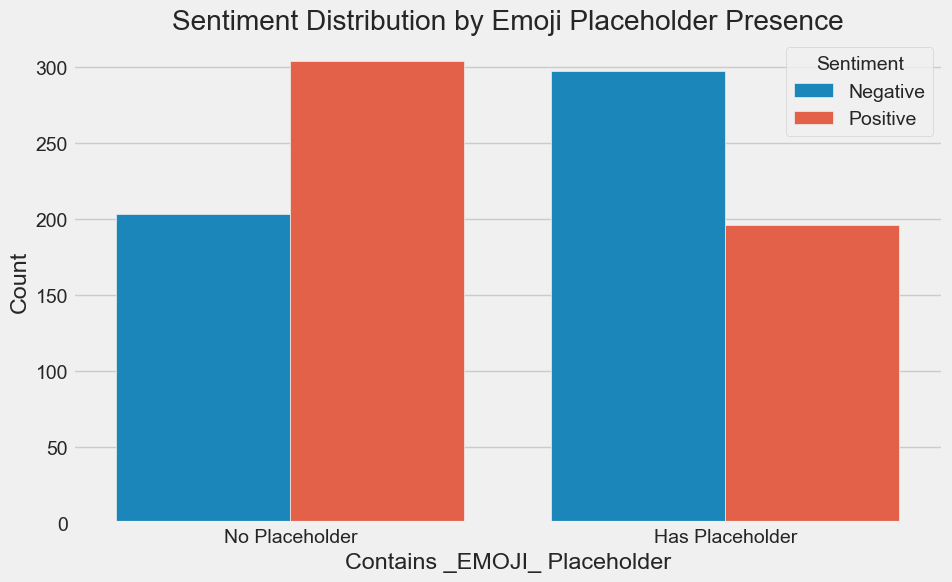

2025-09-22 16:03:18.305 | INFO     | __main__:<module>:21 - 
Analyzing relationship between text length and sentiment...


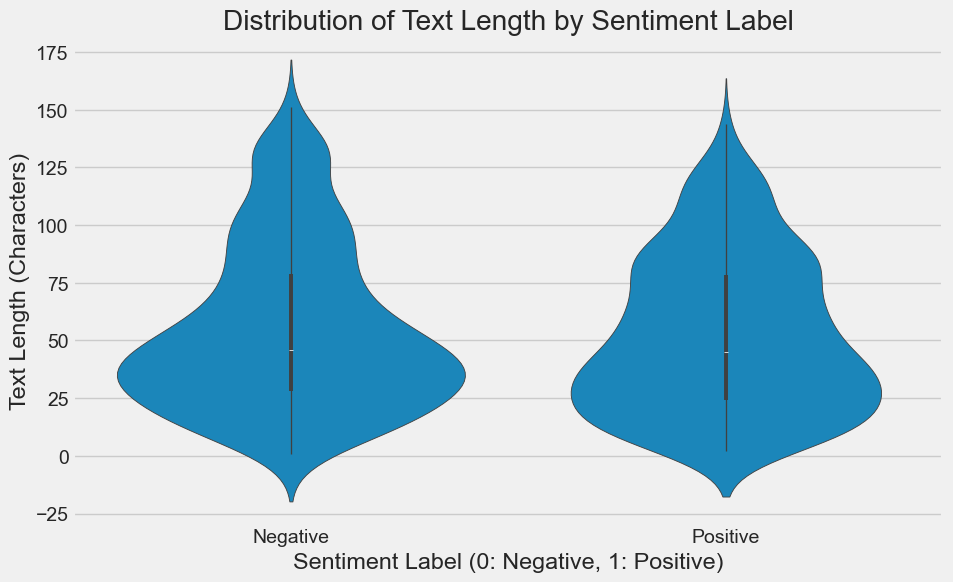

In [ ]:
# Cell 8 — Feature Engineering & Bivariate Plots
# - Add text length, word count, and emoji placeholder features
# - Plot relationships between these features and sentiment

# Add columns for text length and word count
df['text_length'] = df[TEXT_COL].str.len()
df['word_count'] = df[TEXT_COL].str.split().str.len()

# Add a boolean column to indicate the presence of the emoji placeholder
df['has_emoji_placeholder'] = df[TEXT_COL].str.contains('_EMOJI_', na=False)

# Analyze the relationship between the emoji placeholder and sentiment
logger.info("\nAnalyzing relationship between emoji placeholder and sentiment...")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='has_emoji_placeholder', hue=TARGET_COL)
plt.title('Sentiment Distribution by Emoji Placeholder Presence')
plt.xlabel('Contains _EMOJI_ Placeholder')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Placeholder', 'Has Placeholder'])
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()

# Analyze the relationship between text length and sentiment
logger.info("\nAnalyzing relationship between text length and sentiment...")
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x=TARGET_COL, y='text_length')
plt.title('Distribution of Text Length by Sentiment Label')
plt.xlabel('Sentiment Label (0: Negative, 1: Positive)')
plt.ylabel('Text Length (Characters)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()



In [ ]:
# Cell 9 — Univariate Feature Analysis
# Explore distributions of individual features and labels
# to understand spread and potential class imbalance.

# ### Section 5: Univariate Analysis (Individual Features)
# This section remains the same as your previous EDA notebook.




--- Univariate Analysis ---

--- Summary Statistics of Text Length and Word Count ---
       text_length   word_count
count  1000.000000  1000.000000
mean     53.812000     9.879000
std      35.025954     6.592558
min       1.000000     1.000000
25%      25.750000     5.000000
50%      45.500000     8.000000
75%      79.000000    14.000000
max     151.000000    30.000000


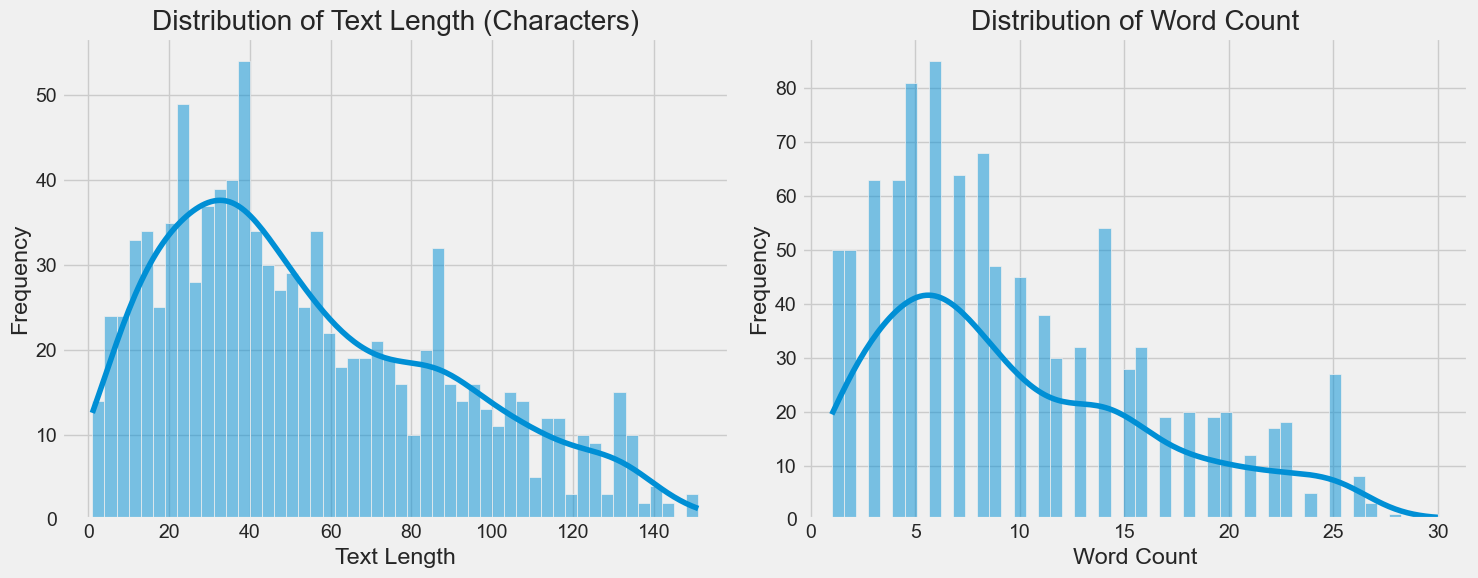


Number of posts with emoji placeholder: 493 out of 1000
Percentage of posts with emoji placeholder: 49.30%

--- Label Distribution ---
label
1    500
0    500
Name: count, dtype: int64


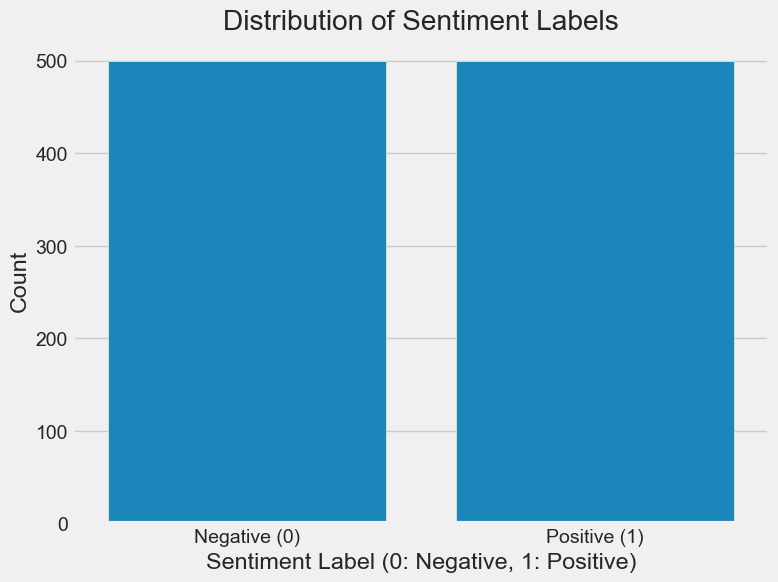

In [ ]:
# Cell 10 — Univariate Analysis
# - Generate summary statistics
# - Plot histograms of text length and word count
# - Report emoji placeholder frequency and label distribution

print("\n" + "="*50)
print("--- Univariate Analysis ---")
print("="*50)

# Summary Statistics
print("\n--- Summary Statistics of Text Length and Word Count ---")
print(df[['text_length', 'word_count']].describe())

# Plot distributions of text length and word count
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['text_length'], ax=axes[0], kde=True, bins=50)
axes[0].set_title('Distribution of Text Length (Characters)')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')

sns.histplot(df['word_count'], ax=axes[1], kde=True, bins=50)
axes[1].set_title('Distribution of Word Count')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze the presence of the emoji placeholder
placeholder_count = df[df[TEXT_COL].str.contains('_EMOJI_', na=False)].shape[0]
total_posts = df.shape[0]
percentage_with_placeholder = (placeholder_count / total_posts) * 100
print(f"\nNumber of posts with emoji placeholder: {placeholder_count} out of {total_posts}")
print(f"Percentage of posts with emoji placeholder: {percentage_with_placeholder:.2f}%")

# Analyze Label Distribution
print("\n--- Label Distribution ---")
label_counts = df[TARGET_COL].value_counts()
print(label_counts)

# Plot the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df[TARGET_COL])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.show()



In [ ]:
# Cell 11 — EDA Summary
# Summarize insights from the analysis:
# - Label balance
# - Emoji placeholder prevalence
# - Feature usefulness for modeling
# Next step: proceed to model training.

# ### Section 6: EDA Summary
# Based on this advanced analysis, here are the key findings that inform our modeling:
# - The dataset is perfectly balanced, with **500 positive** and **500 negative** examples, which is ideal for training a classification model without bias.
# - The **bivariate analysis** shows that **49.30% of posts contain the `_EMOJI_` placeholder**, and there's a strong visual relationship between the placeholder and sentiment, indicating this is a highly predictive engineered feature.
# - The violin plot suggests that text length does not have a strong correlation with sentiment, so a model is less likely to use this as a primary predictor.
# - The data is clean, well-structured, and the key relationships are now understood.
#
# The data is now perfectly ready for the next step: **model training**.